## Including Libraries

In [238]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn import model_selection
from sklearn import linear_model
from sklearn.metrics import f1_score

## 1. Preprocessing

In [239]:
kaggle_train_df = pd.read_csv("train.csv")
kaggle_test_df = pd.read_csv("test.csv")

In [240]:
kaggle_train_df.head()

,Proposal_date,Conversion_result,Field4A,Field4B,Field5,Field6,Field7,Field8A,Field8B,Coverage1,Coverage2,Coverage3,Coverage4,Coverage5,Coverage6,Coverage7,Coverage8,Coverage9,Coverage10,Coverage11,Coverage12,Coverage13,Coverage14,Coverage15,Coverage16,Sales1,Sales2,Sales4A,Sales4B,Sales5,Sales6,Sales6A,Sales6B,Sales7A,Sales7B,Sales8,Sales9,Sales10,Sales11,Sales12,Sales13A,Sales13B,Personal1A,Personal1B,Personal2,Personal3,Personal4A,Personal4B,Personal5,Personal6,Personal7,Personal8A,Personal8B,Personal9,Personal10,Personal11,Personal12,Personal13,Personal14,Personal15,Personal16,Personal17,Personal18,Personal19,Personal20,Personal21A,Personal21B,Personal22A,Personal23,Personal24,Personal25,Personal26,Personal27,Personal28,Personal29,Personal30,Personal31,Personal32,Personal33,Personal34,Personal35,Personal36,Personal37,Personal38,Personal39,Personal40,Personal41,Personal42,Personal43,Personal44,Personal45,Personal46,Personal47,Personal48A,Personal49,Personal50,Personal51,Personal52A,Personal52B,Personal53,Personal54,Personal55,Personal56,Personal57,Personal58,Personal59,Personal60,Personal61,Personal62,Personal63A,Personal63B,Personal63C,Personal64,Personal65,Personal66,Personal67,Personal68,Personal69,Personal70,Personal71,Personal72,Personal73,Personal74,Personal75,Personal76,Property1,Property2A,Property2B,Property3,Property4,Property5,Property6,Property7,Property8A,Property8B,Property9,Property10,Property11,Property12,Property13,Property14,Property15,Property16,Property17,Property18,Property19,Property20,Property21,Property22,Property23,Property24,Property25,Property26,Property27,Property28,Property29,Property30,Property31,Property32,Property33,Property34,Property35,Property36,Property37,Property38,Property39A,Property40,Property41,Property42,Property43,Property44,Property45,Geographic1A,Geographic1B,Geographic2A,Geographic2B,Geographic3A,Geographic3B,Geographic4A,Geographic4B,Geographic5A,Geographic5B,Geographic6A,Geographic6B,Geographic7A,Geographic7B,Geographic8A,Geographic8B,Geographic9A,Geographic9B,Geographic10A,Geographic10B,Geographic11A,Geographic11B,Geographic12A,Geographic12B,Geographic13A,Geographic13B,Geographic14A,Geographic14B,Geographic15A,Geographic15B,Geographic16A,Geographic16B,Geographic17A,Geographic17B,Geographic18A,Geographic18B,Geographic19A,Geographic19B,Geographic20A,Geographic20B,Geographic21A,Geographic21B,Geographic22A,Geographic22B,Geographic23A,Geographic23B,Geographic24A,Geographic24B,Geographic25A,Geographic25B,Geographic26A,Geographic26B,Geographic27A,Geographic27B,Geographic28A,Geographic28B,Geographic29A,Geographic29B,Geographic30A,Geographic30B,Geographic31A,Geographic31B,Geographic32A,Geographic32B,Geographic33A,Geographic33B,Geographic34A,Geographic34B,Geographic35A,Geographic35B,Geographic36A,Geographic36B,Geographic37A,Geographic37B,Geographic38A,Geographic38B,Geographic39A,Geographic39B,Geographic40A,Geographic40B,Geographic41A,Geographic41B,Geographic42A,Geographic42B,Geographic43A,Geographic43B,Geographic44A,Geographic44B,Geographic45A,Geographic45B,Geographic46A,Geographic46B,Geographic47A,Geographic47B,Geographic48A,Geographic48B,Geographic49A,Geographic49B,Geographic50A,Geographic50B,Geographic51A,Geographic51B,Geographic52A,Geographic52B,Geographic53A,Geographic53B,Geographic54A,Geographic54B,Geographic55A,Geographic55B,Geographic56A,Geographic56B,Geographic57A,Geographic57B,Geographic58A,Geographic58B,Geographic59A,Geographic59B,Geographic60A,Geographic60B,Geographic61A,Geographic61B,Geographic62A,Geographic62B,Geographic63,Geographic64,keyValue,Property26C,Property10B,Field13
0,2014-08-18,0,F,7,1.0006,0.0040,548,1.150924,N,4,5,4,5,4,4,4,4,13,22,13,23,Y,E,12,22,2,4,4,13,1,5,5,11,K,14175,0,0,0,1,0,0,0,1,1,14,19,6,1,N,1,2,24,25,0,1,2,3,8,XW,XV,ZW,ZH,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,NaN,7,10,-1,22,N,N,Y,0,R,1,0,1,-1,21,4,0,B,4,5,9,0,2,1,0,4,5,2,1,13,19,2.0,9,12,14,A,NaN,N,O,Y,H,Y,2,N,N,

In [241]:
kaggle_test_df.head()

,Proposal_date,Field4A,Field4B,Field5,Field6,Field7,Field8A,Field8B,Coverage1,Coverage2,Coverage3,Coverage4,Coverage5,Coverage6,Coverage7,Coverage8,Coverage9,Coverage10,Coverage11,Coverage12,Coverage13,Coverage14,Coverage15,Coverage16,Sales1,Sales2,Sales4A,Sales4B,Sales5,Sales6,Sales6A,Sales6B,Sales7A,Sales7B,Sales8,Sales9,Sales10,Sales11,Sales12,Sales13A,Sales13B,Personal1A,Personal1B,Personal2,Personal3,Personal4A,Personal4B,Personal5,Personal6,Personal7,Personal8A,Personal8B,Personal9,Personal10,Personal11,Personal12,Personal13,Personal14,Personal15,Personal16,Personal17,Personal18,Personal19,Personal20,Personal21A,Personal21B,Personal22A,Personal23,Personal24,Personal25,Personal26,Personal27,Personal28,Personal29,Personal30,Personal31,Personal32,Personal33,Personal34,Personal35,Personal36,Personal37,Personal38,Personal39,Personal40,Personal41,Personal42,Personal43,Personal44,Personal45,Personal46,Personal47,Personal48A,Personal49,Personal50,Personal51,Personal52A,Personal52B,Personal53,Personal54,Personal55,Personal56,Personal57,Personal58,Personal59,Personal60,Personal61,Personal62,Personal63A,Personal63B,Personal63C,Personal64,Personal65,Personal66,Personal67,Personal68,Personal69,Personal70,Personal71,Personal72,Personal73,Personal74,Personal75,Personal76,Property1,Property2A,Property2B,Property3,Property4,Property5,Property6,Property7,Property8A,Property8B,Property9,Property10,Property11,Property12,Property13,Property14,Property15,Property16,Property17,Property18,Property19,Property20,Property21,Property22,Property23,Property24,Property25,Property26,Property27,Property28,Property29,Property30,Property31,Property32,Property33,Property34,Property35,Property36,Property37,Property38,Property39A,Property40,Property41,Property42,Property43,Property44,Property45,Geographic1A,Geographic1B,Geographic2A,Geographic2B,Geographic3A,Geographic3B,Geographic4A,Geographic4B,Geographic5A,Geographic5B,Geographic6A,Geographic6B,Geographic7A,Geographic7B,Geographic8A,Geographic8B,Geographic9A,Geographic9B,Geographic10A,Geographic10B,Geographic11A,Geographic11B,Geographic12A,Geographic12B,Geographic13A,Geographic13B,Geographic14A,Geographic14B,Geographic15A,Geographic15B,Geographic16A,Geographic16B,Geographic17A,Geographic17B,Geographic18A,Geographic18B,Geographic19A,Geographic19B,Geographic20A,Geographic20B,Geographic21A,Geographic21B,Geographic22A,Geographic22B,Geographic23A,Geographic23B,Geographic24A,Geographic24B,Geographic25A,Geographic25B,Geographic26A,Geographic26B,Geographic27A,Geographic27B,Geographic28A,Geographic28B,Geographic29A,Geographic29B,Geographic30A,Geographic30B,Geographic31A,Geographic31B,Geographic32A,Geographic32B,Geographic33A,Geographic33B,Geographic34A,Geographic34B,Geographic35A,Geographic35B,Geographic36A,Geographic36B,Geographic37A,Geographic37B,Geographic38A,Geographic38B,Geographic39A,Geographic39B,Geographic40A,Geographic40B,Geographic41A,Geographic41B,Geographic42A,Geographic42B,Geographic43A,Geographic43B,Geographic44A,Geographic44B,Geographic45A,Geographic45B,Geographic46A,Geographic46B,Geographic47A,Geographic47B,Geographic48A,Geographic48B,Geographic49A,Geographic49B,Geographic50A,Geographic50B,Geographic51A,Geographic51B,Geographic52A,Geographic52B,Geographic53A,Geographic53B,Geographic54A,Geographic54B,Geographic55A,Geographic55B,Geographic56A,Geographic56B,Geographic57A,Geographic57B,Geographic58A,Geographic58B,Geographic59A,Geographic59B,Geographic60A,Geographic60B,Geographic61A,Geographic61B,Geographic62A,Geographic62B,Geographic63,Geographic64,keyValue,Property26C,Property10B,Field13
0,2014-03-13,F,7,0.9566,0.0040,548,1.148768,N,8,13,8,14,11,18,8,13,25,25,25,25,Y,E,8,16,5,16,5,16,1,1,3,20,P,27111,0,1,2,2,0,0,0,1,1,14,18,7,0,N,1,2,16,21,0,1,2,4,8,ZK,XV,ZW,XV,3,1,1,1,1,1,3,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,1,1,1,3,0,0,0,0,1,0,0,0,0,1,1,1,1,1,3,0,0,0,0,1,2.0,6,9,-1,23,N,N,Y,0,R,1,0,1,-1,23,1,2,C,4,7,16,0,2,1,0,8,13,2,1,11,16,2.0,7,9,4,B,NaN,N,O,Y,H,Y,1,N,N,N,14,18,6,13,13,

Dropping unwanted column : Proposal Date.

In [242]:
kaggle_train_df = kaggle_train_df.drop(['Proposal_date'], axis=1)
kaggle_test_df = kaggle_test_df.drop(['Proposal_date'], axis=1)

In [243]:
pd.set_option("display.max_columns",None)
kaggle_train_df.head()

,Conversion_result,Field4A,Field4B,Field5,Field6,Field7,Field8A,Field8B,Coverage1,Coverage2,Coverage3,Coverage4,Coverage5,Coverage6,Coverage7,Coverage8,Coverage9,Coverage10,Coverage11,Coverage12,Coverage13,Coverage14,Coverage15,Coverage16,Sales1,Sales2,Sales4A,Sales4B,Sales5,Sales6,Sales6A,Sales6B,Sales7A,Sales7B,Sales8,Sales9,Sales10,Sales11,Sales12,Sales13A,Sales13B,Personal1A,Personal1B,Personal2,Personal3,Personal4A,Personal4B,Personal5,Personal6,Personal7,Personal8A,Personal8B,Personal9,Personal10,Personal11,Personal12,Personal13,Personal14,Personal15,Personal16,Personal17,Personal18,Personal19,Personal20,Personal21A,Personal21B,Personal22A,Personal23,Personal24,Personal25,Personal26,Personal27,Personal28,Personal29,Personal30,Personal31,Personal32,Personal33,Personal34,Personal35,Personal36,Personal37,Personal38,Personal39,Personal40,Personal41,Personal42,Personal43,Personal44,Personal45,Personal46,Personal47,Personal48A,Personal49,Personal50,Personal51,Personal52A,Personal52B,Personal53,Personal54,Personal55,Personal56,Personal57,Personal58,Personal59,Personal60,Personal61,Personal62,Personal63A,Personal63B,Personal63C,Personal64,Personal65,Personal66,Personal67,Personal68,Personal69,Personal70,Personal71,Personal72,Personal73,Personal74,Personal75,Personal76,Property1,Property2A,Property2B,Property3,Property4,Property5,Property6,Property7,Property8A,Property8B,Property9,Property10,Property11,Property12,Property13,Property14,Property15,Property16,Property17,Property18,Property19,Property20,Property21,Property22,Property23,Property24,Property25,Property26,Property27,Property28,Property29,Property30,Property31,Property32,Property33,Property34,Property35,Property36,Property37,Property38,Property39A,Property40,Property41,Property42,Property43,Property44,Property45,Geographic1A,Geographic1B,Geographic2A,Geographic2B,Geographic3A,Geographic3B,Geographic4A,Geographic4B,Geographic5A,Geographic5B,Geographic6A,Geographic6B,Geographic7A,Geographic7B,Geographic8A,Geographic8B,Geographic9A,Geographic9B,Geographic10A,Geographic10B,Geographic11A,Geographic11B,Geographic12A,Geographic12B,Geographic13A,Geographic13B,Geographic14A,Geographic14B,Geographic15A,Geographic15B,Geographic16A,Geographic16B,Geographic17A,Geographic17B,Geographic18A,Geographic18B,Geographic19A,Geographic19B,Geographic20A,Geographic20B,Geographic21A,Geographic21B,Geographic22A,Geographic22B,Geographic23A,Geographic23B,Geographic24A,Geographic24B,Geographic25A,Geographic25B,Geographic26A,Geographic26B,Geographic27A,Geographic27B,Geographic28A,Geographic28B,Geographic29A,Geographic29B,Geographic30A,Geographic30B,Geographic31A,Geographic31B,Geographic32A,Geographic32B,Geographic33A,Geographic33B,Geographic34A,Geographic34B,Geographic35A,Geographic35B,Geographic36A,Geographic36B,Geographic37A,Geographic37B,Geographic38A,Geographic38B,Geographic39A,Geographic39B,Geographic40A,Geographic40B,Geographic41A,Geographic41B,Geographic42A,Geographic42B,Geographic43A,Geographic43B,Geographic44A,Geographic44B,Geographic45A,Geographic45B,Geographic46A,Geographic46B,Geographic47A,Geographic47B,Geographic48A,Geographic48B,Geographic49A,Geographic49B,Geographic50A,Geographic50B,Geographic51A,Geographic51B,Geographic52A,Geographic52B,Geographic53A,Geographic53B,Geographic54A,Geographic54B,Geographic55A,Geographic55B,Geographic56A,Geographic56B,Geographic57A,Geographic57B,Geographic58A,Geographic58B,Geographic59A,Geographic59B,Geographic60A,Geographic60B,Geographic61A,Geographic61B,Geographic62A,Geographic62B,Geographic63,Geographic64,keyValue,Property26C,Property10B,Field13
0,0,F,7,1.0006,0.0040,548,1.150924,N,4,5,4,5,4,4,4,4,13,22,13,23,Y,E,12,22,2,4,4,13,1,5,5,11,K,14175,0,0,0,1,0,0,0,1,1,14,19,6,1,N,1,2,24,25,0,1,2,3,8,XW,XV,ZW,ZH,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,NaN,7,10,-1,22,N,N,Y,0,R,1,0,1,-1,21,4,0,B,4,5,9,0,2,1,0,4,5,2,1,13,19,2.0,9,12,14,A,NaN,N,O,Y,H,Y,2,N,N,N,25,25,3,7,15,15,13,15,1

In [244]:
kaggle_train_df.shape, kaggle_test_df.shape

((155148, 301), (66492, 300))

Conversion_result analysis in the given train_csv :-

0    126031
1     29117
Name: Conversion_result, dtype: int64


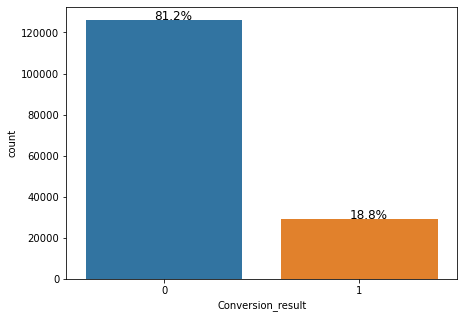

In [245]:
def countplot_graph(plot, feature):
    total = len(feature)
    for p in plot.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        plot.annotate(percentage, (x, y), size = 12)
    plt.show()
    
print(kaggle_train_df['Conversion_result'].value_counts())

plt.figure(figsize = (7,5))
graph = sns.countplot(x='Conversion_result',data=kaggle_train_df)
countplot_graph(graph, kaggle_train_df.Conversion_result)

In [246]:
kaggle_train_df.describe()

,Conversion_result,Field4B,Field5,Field6,Field8A,Coverage1,Coverage2,Coverage3,Coverage4,Coverage5,Coverage6,Coverage7,Coverage8,Coverage9,Coverage10,Coverage11,Coverage12,Coverage15,Coverage16,Sales1,Sales2,Sales4A,Sales4B,Sales5,Sales6,Sales6A,Sales6B,Sales7B,Sales8,Sales9,Sales10,Sales11,Sales12,Sales13A,Sales13B,Personal1A,Personal1B,Personal2,Personal3,Personal4A,Personal4B,Personal6,Personal7,Personal8A,Personal8B,Personal9,Personal10,Personal11,Personal12,Personal13,Personal18,Personal19,Personal20,Personal21A,Personal21B,Personal22A,Personal23,Personal24,Personal25,Personal26,Personal27,Personal28,Personal29,Personal30,Personal31,Personal32,Personal33,Personal34,Personal35,Personal36,Personal37,Personal38,Personal39,Personal40,Personal41,Personal42,Personal43,Personal44,Personal45,Personal46,Personal47,Personal48A,Personal49,Personal50,Personal51,Personal52A,Personal52B,Personal53,Personal54,Personal55,Personal56,Personal57,Personal58,Personal59,Personal60,Personal61,Personal62,Personal63A,Personal63B,Personal63C,Personal64,Personal65,Personal66,Personal67,Personal68,Personal69,Personal70,Personal71,Personal72,Personal73,Personal74,Personal75,Personal76,Property1,Property2A,Property2B,Property3,Property7,Property8B,Property9,Property10,Property11,Property12,Property13,Property14,Property16,Property17,Property18,Property19,Property20,Property21,Property22,Property23,Property24,Property25,Property26,Property27,Property28,Property29,Property30,Property31,Property32,Property34,Property40,Property44,Property45,Geographic1A,Geographic1B,Geographic2A,Geographic2B,Geographic3A,Geographic3B,Geographic4A,Geographic4B,Geographic5A,Geographic5B,Geographic6A,Geographic6B,Geographic7A,Geographic7B,Geographic8A,Geographic8B,Geographic9A,Geographic9B,Geographic10A,Geographic10B,Geographic11A,Geographic11B,Geographic12A,Geographic12B,Geographic13A,Geographic13B,Geographic14A,Geographic14B,Geographic15A,Geographic15B,Geographic16A,Geographic16B,Geographic17A,Geographic17B,Geographic18A,Geographic18B,Geographic19A,Geographic19B,Geographic20A,Geographic20B,Geographic21A,Geographic21B,Geographic22A,Geographic22B,Geographic23A,Geographic23B,Geographic24A,Geographic24B,Geographic25A,Geographic25B,Geographic26A,Geographic26B,Geographic27A,Geographic27B,Geographic28A,Geographic28B,Geographic29A,Geographic29B,Geographic30A,Geographic30B,Geographic31A,Geographic31B,Geographic32A,Geographic32B,Geographic33A,Geographic33B,Geographic34A,Geographic34B,Geographic35A,Geographic35B,Geographic36A,Geographic36B,Geographic37A,Geographic37B,Geographic38A,Geographic38B,Geographic39A,Geographic39B,Geographic40A,Geographic40B,Geographic41A,Geographic41B,Geographic42A,Geographic42B,Geographic43A,Geographic43B,Geographic44A,Geographic44B,Geographic45A,Geographic45B,Geographic46A,Geographic46B,Geographic47A,Geographic47B,Geographic48A,Geographic48B,Geographic49A,Geographic49B,Geographic50A,Geographic50B,Geographic51A,Geographic51B,Geographic52A,Geographic52B,Geographic53A,Geographic53B,Geographic54A,Geographic54B,Geographic55A,Geographic55B,Geographic56A,Geographic56B,Geographic57A,Geographic57B,Geographic58A,Geographic58B,Geographic59A,Geographic59B,Geographic60A,Geographic60B,Geographic61A,Geographic61B,Geographic62A,Geographic62B,keyValue,Property26C,Property10B,Field13
count,155148.000000,155148.000000,155148.000000,155148.000000,155148.000000,155148.000000,155148.00000,155148.000000,155148.000000,155148.000000,155148.000000,155148.000000,155148.000000,155148.000000,155148.000000,155148.000000,155148.000000,155148.000000,155148.000000,155148.000000,155148.000000,155148.000000,155148.000000,155148.000000,155148.000000,155148.000000,155148.000000,155148.000000,155148.000000,155148.000000,155148.000000,155148.000000,155148.000000,155148.000000,155148.000000,155148.000000,155148.000000,155148.000000,155148.000000,155148.000000,155148.000000,155148.000000,155148.000000,155148.000000,155148.000000,155148.000000,155148.000000,155148.000000,155148.000000,155148.0000

In [247]:
def get_missing_data():
    Missing_Data = kaggle_train_df.isnull().sum().sort_values()
    Missing_Data_precentage = ((kaggle_train_df.isnull().sum()/kaggle_train_df.isnull().count())*100).sort_values()
    return pd.concat([Missing_Data, Missing_Data_precentage], axis=1, keys=['Missing_Data', 'Percentage'])

pd.set_option("display.max_rows",None)
get_missing_data()

,Missing_Data,Percentage
Conversion_result,0,0.000000
Geographic18A,0,0.000000
Geographic17B,0,0.000000
Geographic17A,0,0.000000
Geographic16B,0,0.000000
Geographic16A,0,0.000000
Geographic15B,0,0.000000
Geographic18B,0,0.000000
Geographic15A,0,0.000000
Geographic14A,0,0.000000


Dropping the columns with more than 75% missing data. Because filling this much amount of data with any process will only lead towards corrupting the data.

Therefore, dropping the column "Property34" .

In [248]:
kaggle_train_df = kaggle_train_df.dropna(axis=1, thresh=(0.25*kaggle_train_df.shape[0]))
kaggle_test_df = kaggle_test_df.drop(['Property34'], axis=1)
kaggle_train_df.shape

(155148, 300)

There are multiple features with less than 100nan values. It won't affect data if just those rows are removed.

Therefore, removing the rows for those particular features which have less than 100 nan values which are ['Property5', 'Property37', 'Property39A', 'Property4', 'Personal5', 'Property41'].

In [249]:
column_less_than_100_nan = ['Property5', 'Property37', 'Property39A', 'Property4', 'Personal5', 'Property41']

for col in range(len(column_less_than_100_nan)):
    kaggle_train_df.drop(axis="rows", labels=kaggle_train_df.index[kaggle_train_df[column_less_than_100_nan[col]].isna()], inplace=True)
    
kaggle_train_df.shape

(155033, 300)

In [250]:
# get_missing_data()

Now working on the nan values of feature "Personal76".

In [251]:
kaggle_train_df['Personal76'].unique()

array([nan,  2.,  1.,  5.,  7.,  3.,  4.])

In [252]:
kaggle_train_df['Personal76'].value_counts()

2.0    80196
1.0      933
5.0       32
7.0        2
4.0        2
3.0        2
Name: Personal76, dtype: int64

In [253]:
column_name = ['Personal76']
kaggle_train_df[column_name].describe()

,Personal76
count,81167.000000
mean,1.989885
std,0.125220
min,1.000000
25%,2.000000
50%,2.000000
75%,2.000000
max,7.000000


Above we can see that mean and median(50%) are almost equal, so we can fill out nan values with any of mean or median.

So filling nan values with median.

In [254]:
kaggle_train_df["Personal76"].fillna(kaggle_train_df["Personal76"].median(), inplace=True)

In [255]:
# get_missing_data()

Now working on the nan values of feature "Property43".

In [256]:
kaggle_train_df['Property43'].unique()

array(['N', nan, 'Y'], dtype=object)

In [257]:
kaggle_train_df['Property43'].value_counts()

N    151072
Y      3327
Name: Property43, dtype: int64

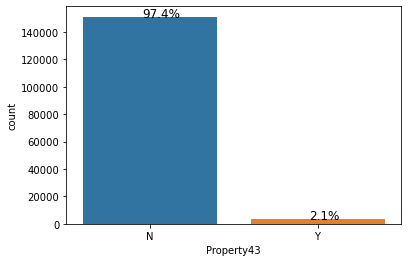

In [258]:
countplot_graph(sns.countplot(x='Property43',data=kaggle_train_df), kaggle_train_df.Property43)

We can see that this data has mode value for "N" with a percent of 97.5 so filling the nan values with "N".

In [259]:
kaggle_train_df['Property43'] = kaggle_train_df['Property43'].fillna('N')

In [260]:
# get_missing_data()

Now we don't have any nan values left in our dataset.

Checking for duplicate rows :-

There are no duplicate rows in the dataset.

In [261]:
kaggle_train_df.duplicated().sum()

0

Converting categorical data into numerical data using Label Encoder.

In [262]:
num_cols = kaggle_train_df._get_numeric_data()
cat_cols = list(set(kaggle_train_df.columns) - set(num_cols))
cat_cols

['Field7',
 'Property39A',
 'Geographic64',
 'Property35',
 'Property15',
 'Property5',
 'Property6',
 'Coverage13',
 'Property4',
 'Property8A',
 'Property36',
 'Personal16',
 'Geographic63',
 'Property42',
 'Personal14',
 'Field4A',
 'Property38',
 'Field8B',
 'Property37',
 'Property43',
 'Property41',
 'Coverage14',
 'Personal15',
 'Sales7A',
 'Personal5',
 'Property33',
 'Personal17']

In [263]:
for col in cat_cols:
  kaggle_train_df[col] = LabelEncoder().fit_transform(kaggle_train_df[col])

In [264]:
kaggle_train_df.head()

,Conversion_result,Field4A,Field4B,Field5,Field6,Field7,Field8A,Field8B,Coverage1,Coverage2,Coverage3,Coverage4,Coverage5,Coverage6,Coverage7,Coverage8,Coverage9,Coverage10,Coverage11,Coverage12,Coverage13,Coverage14,Coverage15,Coverage16,Sales1,Sales2,Sales4A,Sales4B,Sales5,Sales6,Sales6A,Sales6B,Sales7A,Sales7B,Sales8,Sales9,Sales10,Sales11,Sales12,Sales13A,Sales13B,Personal1A,Personal1B,Personal2,Personal3,Personal4A,Personal4B,Personal5,Personal6,Personal7,Personal8A,Personal8B,Personal9,Personal10,Personal11,Personal12,Personal13,Personal14,Personal15,Personal16,Personal17,Personal18,Personal19,Personal20,Personal21A,Personal21B,Personal22A,Personal23,Personal24,Personal25,Personal26,Personal27,Personal28,Personal29,Personal30,Personal31,Personal32,Personal33,Personal34,Personal35,Personal36,Personal37,Personal38,Personal39,Personal40,Personal41,Personal42,Personal43,Personal44,Personal45,Personal46,Personal47,Personal48A,Personal49,Personal50,Personal51,Personal52A,Personal52B,Personal53,Personal54,Personal55,Personal56,Personal57,Personal58,Personal59,Personal60,Personal61,Personal62,Personal63A,Personal63B,Personal63C,Personal64,Personal65,Personal66,Personal67,Personal68,Personal69,Personal70,Personal71,Personal72,Personal73,Personal74,Personal75,Personal76,Property1,Property2A,Property2B,Property3,Property4,Property5,Property6,Property7,Property8A,Property8B,Property9,Property10,Property11,Property12,Property13,Property14,Property15,Property16,Property17,Property18,Property19,Property20,Property21,Property22,Property23,Property24,Property25,Property26,Property27,Property28,Property29,Property30,Property31,Property32,Property33,Property35,Property36,Property37,Property38,Property39A,Property40,Property41,Property42,Property43,Property44,Property45,Geographic1A,Geographic1B,Geographic2A,Geographic2B,Geographic3A,Geographic3B,Geographic4A,Geographic4B,Geographic5A,Geographic5B,Geographic6A,Geographic6B,Geographic7A,Geographic7B,Geographic8A,Geographic8B,Geographic9A,Geographic9B,Geographic10A,Geographic10B,Geographic11A,Geographic11B,Geographic12A,Geographic12B,Geographic13A,Geographic13B,Geographic14A,Geographic14B,Geographic15A,Geographic15B,Geographic16A,Geographic16B,Geographic17A,Geographic17B,Geographic18A,Geographic18B,Geographic19A,Geographic19B,Geographic20A,Geographic20B,Geographic21A,Geographic21B,Geographic22A,Geographic22B,Geographic23A,Geographic23B,Geographic24A,Geographic24B,Geographic25A,Geographic25B,Geographic26A,Geographic26B,Geographic27A,Geographic27B,Geographic28A,Geographic28B,Geographic29A,Geographic29B,Geographic30A,Geographic30B,Geographic31A,Geographic31B,Geographic32A,Geographic32B,Geographic33A,Geographic33B,Geographic34A,Geographic34B,Geographic35A,Geographic35B,Geographic36A,Geographic36B,Geographic37A,Geographic37B,Geographic38A,Geographic38B,Geographic39A,Geographic39B,Geographic40A,Geographic40B,Geographic41A,Geographic41B,Geographic42A,Geographic42B,Geographic43A,Geographic43B,Geographic44A,Geographic44B,Geographic45A,Geographic45B,Geographic46A,Geographic46B,Geographic47A,Geographic47B,Geographic48A,Geographic48B,Geographic49A,Geographic49B,Geographic50A,Geographic50B,Geographic51A,Geographic51B,Geographic52A,Geographic52B,Geographic53A,Geographic53B,Geographic54A,Geographic54B,Geographic55A,Geographic55B,Geographic56A,Geographic56B,Geographic57A,Geographic57B,Geographic58A,Geographic58B,Geographic59A,Geographic59B,Geographic60A,Geographic60B,Geographic61A,Geographic61B,Geographic62A,Geographic62B,Geographic63,Geographic64,keyValue,Property26C,Property10B,Field13
0,0,5,7,1.0006,0.0040,4,1.150924,0,4,5,4,5,4,4,4,4,13,22,13,23,5,4,12,22,2,4,4,13,1,5,5,11,0,14175,0,0,0,1,0,0,0,1,1,14,19,6,1,0,1,2,24,25,0,1,2,3,8,19,19,58,42,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,2.0,7,10,-1,22,0,0,1,0,17,1,0,1,-1,21,4,0,1,4,5,9,0,2,1,0,4,5,2,1,13,19,2.0,9,12,14,0,0,3,1,3,1,2,0,0,0,25,25,3,7,15,15,13,15,12,11,-1,21,4,12,

In [265]:
kaggle_train_df.shape

(155033, 300)

In [266]:
train_df = kaggle_train_df

In [267]:
train_df.shape

(155033, 300)

In [268]:
train_df.drop(columns="keyValue", inplace=True)
train_df.shape

(155033, 299)

In [269]:
train_df.describe()

,Conversion_result,Field4A,Field4B,Field5,Field6,Field7,Field8A,Field8B,Coverage1,Coverage2,Coverage3,Coverage4,Coverage5,Coverage6,Coverage7,Coverage8,Coverage9,Coverage10,Coverage11,Coverage12,Coverage13,Coverage14,Coverage15,Coverage16,Sales1,Sales2,Sales4A,Sales4B,Sales5,Sales6,Sales6A,Sales6B,Sales7A,Sales7B,Sales8,Sales9,Sales10,Sales11,Sales12,Sales13A,Sales13B,Personal1A,Personal1B,Personal2,Personal3,Personal4A,Personal4B,Personal5,Personal6,Personal7,Personal8A,Personal8B,Personal9,Personal10,Personal11,Personal12,Personal13,Personal14,Personal15,Personal16,Personal17,Personal18,Personal19,Personal20,Personal21A,Personal21B,Personal22A,Personal23,Personal24,Personal25,Personal26,Personal27,Personal28,Personal29,Personal30,Personal31,Personal32,Personal33,Personal34,Personal35,Personal36,Personal37,Personal38,Personal39,Personal40,Personal41,Personal42,Personal43,Personal44,Personal45,Personal46,Personal47,Personal48A,Personal49,Personal50,Personal51,Personal52A,Personal52B,Personal53,Personal54,Personal55,Personal56,Personal57,Personal58,Personal59,Personal60,Personal61,Personal62,Personal63A,Personal63B,Personal63C,Personal64,Personal65,Personal66,Personal67,Personal68,Personal69,Personal70,Personal71,Personal72,Personal73,Personal74,Personal75,Personal76,Property1,Property2A,Property2B,Property3,Property4,Property5,Property6,Property7,Property8A,Property8B,Property9,Property10,Property11,Property12,Property13,Property14,Property15,Property16,Property17,Property18,Property19,Property20,Property21,Property22,Property23,Property24,Property25,Property26,Property27,Property28,Property29,Property30,Property31,Property32,Property33,Property35,Property36,Property37,Property38,Property39A,Property40,Property41,Property42,Property43,Property44,Property45,Geographic1A,Geographic1B,Geographic2A,Geographic2B,Geographic3A,Geographic3B,Geographic4A,Geographic4B,Geographic5A,Geographic5B,Geographic6A,Geographic6B,Geographic7A,Geographic7B,Geographic8A,Geographic8B,Geographic9A,Geographic9B,Geographic10A,Geographic10B,Geographic11A,Geographic11B,Geographic12A,Geographic12B,Geographic13A,Geographic13B,Geographic14A,Geographic14B,Geographic15A,Geographic15B,Geographic16A,Geographic16B,Geographic17A,Geographic17B,Geographic18A,Geographic18B,Geographic19A,Geographic19B,Geographic20A,Geographic20B,Geographic21A,Geographic21B,Geographic22A,Geographic22B,Geographic23A,Geographic23B,Geographic24A,Geographic24B,Geographic25A,Geographic25B,Geographic26A,Geographic26B,Geographic27A,Geographic27B,Geographic28A,Geographic28B,Geographic29A,Geographic29B,Geographic30A,Geographic30B,Geographic31A,Geographic31B,Geographic32A,Geographic32B,Geographic33A,Geographic33B,Geographic34A,Geographic34B,Geographic35A,Geographic35B,Geographic36A,Geographic36B,Geographic37A,Geographic37B,Geographic38A,Geographic38B,Geographic39A,Geographic39B,Geographic40A,Geographic40B,Geographic41A,Geographic41B,Geographic42A,Geographic42B,Geographic43A,Geographic43B,Geographic44A,Geographic44B,Geographic45A,Geographic45B,Geographic46A,Geographic46B,Geographic47A,Geographic47B,Geographic48A,Geographic48B,Geographic49A,Geographic49B,Geographic50A,Geographic50B,Geographic51A,Geographic51B,Geographic52A,Geographic52B,Geographic53A,Geographic53B,Geographic54A,Geographic54B,Geographic55A,Geographic55B,Geographic56A,Geographic56B,Geographic57A,Geographic57B,Geographic58A,Geographic58B,Geographic59A,Geographic59B,Geographic60A,Geographic60B,Geographic61A,Geographic61B,Geographic62A,Geographic62B,Geographic63,Geographic64,Property26C,Property10B,Field13
count,155033.000000,155033.000000,155033.000000,155033.000000,155033.000000,155033.000000,155033.000000,155033.000000,155033.000000,155033.000000,155033.000000,155033.000000,155033.000000,155033.000000,155033.000000,155033.000000,155033.000000,155033.000000,155033.000000,155033.000000,155033.000000,155033.000000,155033.000000,155033.000000,155033.000000,155033.000000,155033.000000,155033.000000,155033.000000,155033.000000,155033.0000

In [270]:
train_df.isnull().sum()

Conversion_result    0
Field4A              0
Field4B              0
Field5               0
Field6               0
Field7               0
Field8A              0
Field8B              0
Coverage1            0
Coverage2            0
Coverage3            0
Coverage4            0
Coverage5            0
Coverage6            0
Coverage7            0
Coverage8            0
Coverage9            0
Coverage10           0
Coverage11           0
Coverage12           0
Coverage13           0
Coverage14           0
Coverage15           0
Coverage16           0
Sales1               0
Sales2               0
Sales4A              0
Sales4B              0
Sales5               0
Sales6               0
Sales6A              0
Sales6B              0
Sales7A              0
Sales7B              0
Sales8               0
Sales9               0
Sales10              0
Sales11              0
Sales12              0
Sales13A             0
Sales13B             0
Personal1A           0
Personal1B           0
Personal2  

In [271]:
# correlation_matrix = abs(train_df.corr())
# correlation_target = correlation_matrix["Conversion_result"]
# pd.set_option("display.max_rows",None)
# correlation_target

## Applying PCA :-

In [272]:
train_df.shape

(155033, 299)

In [273]:
train_df.columns

Index(['Conversion_result', 'Field4A', 'Field4B', 'Field5', 'Field6', 'Field7',
       'Field8A', 'Field8B', 'Coverage1', 'Coverage2',
       ...
       'Geographic60B', 'Geographic61A', 'Geographic61B', 'Geographic62A',
       'Geographic62B', 'Geographic63', 'Geographic64', 'Property26C',
       'Property10B', 'Field13'],
      dtype='object', length=299)

## Splitting the data

In [274]:
# final_train_df.isnull().sum()

In [275]:
main_X = train_df.drop(columns="Conversion_result")
main_y = train_df["Conversion_result"]
from sklearn import preprocessing
scaler_ss = preprocessing.StandardScaler()
main_X_scaled = scaler_ss.fit_transform(main_X)

train_X, test_X, train_y, test_y = model_selection.train_test_split(main_X_scaled, main_y, train_size=0.8, random_state=0)

## Logistic Regression Model

In [276]:
model = linear_model.LogisticRegression()
model.fit(train_X, train_y)
preds = model.predict(test_X)
preds

array([0, 1, 0, ..., 1, 0, 0], dtype=int64)

In [277]:
# def F1_score(recall, precision):
#     return 2*((recall*precision)/(recall+precision))

# print(F1_score(recall_score(tp,fn), precision_score(tp,fp)))

f1_score(test_y, preds, average='macro')

0.8430238484717272

## Working on kaggle test data :-

In [278]:
kaggle_test_df.head()

,Field4A,Field4B,Field5,Field6,Field7,Field8A,Field8B,Coverage1,Coverage2,Coverage3,Coverage4,Coverage5,Coverage6,Coverage7,Coverage8,Coverage9,Coverage10,Coverage11,Coverage12,Coverage13,Coverage14,Coverage15,Coverage16,Sales1,Sales2,Sales4A,Sales4B,Sales5,Sales6,Sales6A,Sales6B,Sales7A,Sales7B,Sales8,Sales9,Sales10,Sales11,Sales12,Sales13A,Sales13B,Personal1A,Personal1B,Personal2,Personal3,Personal4A,Personal4B,Personal5,Personal6,Personal7,Personal8A,Personal8B,Personal9,Personal10,Personal11,Personal12,Personal13,Personal14,Personal15,Personal16,Personal17,Personal18,Personal19,Personal20,Personal21A,Personal21B,Personal22A,Personal23,Personal24,Personal25,Personal26,Personal27,Personal28,Personal29,Personal30,Personal31,Personal32,Personal33,Personal34,Personal35,Personal36,Personal37,Personal38,Personal39,Personal40,Personal41,Personal42,Personal43,Personal44,Personal45,Personal46,Personal47,Personal48A,Personal49,Personal50,Personal51,Personal52A,Personal52B,Personal53,Personal54,Personal55,Personal56,Personal57,Personal58,Personal59,Personal60,Personal61,Personal62,Personal63A,Personal63B,Personal63C,Personal64,Personal65,Personal66,Personal67,Personal68,Personal69,Personal70,Personal71,Personal72,Personal73,Personal74,Personal75,Personal76,Property1,Property2A,Property2B,Property3,Property4,Property5,Property6,Property7,Property8A,Property8B,Property9,Property10,Property11,Property12,Property13,Property14,Property15,Property16,Property17,Property18,Property19,Property20,Property21,Property22,Property23,Property24,Property25,Property26,Property27,Property28,Property29,Property30,Property31,Property32,Property33,Property35,Property36,Property37,Property38,Property39A,Property40,Property41,Property42,Property43,Property44,Property45,Geographic1A,Geographic1B,Geographic2A,Geographic2B,Geographic3A,Geographic3B,Geographic4A,Geographic4B,Geographic5A,Geographic5B,Geographic6A,Geographic6B,Geographic7A,Geographic7B,Geographic8A,Geographic8B,Geographic9A,Geographic9B,Geographic10A,Geographic10B,Geographic11A,Geographic11B,Geographic12A,Geographic12B,Geographic13A,Geographic13B,Geographic14A,Geographic14B,Geographic15A,Geographic15B,Geographic16A,Geographic16B,Geographic17A,Geographic17B,Geographic18A,Geographic18B,Geographic19A,Geographic19B,Geographic20A,Geographic20B,Geographic21A,Geographic21B,Geographic22A,Geographic22B,Geographic23A,Geographic23B,Geographic24A,Geographic24B,Geographic25A,Geographic25B,Geographic26A,Geographic26B,Geographic27A,Geographic27B,Geographic28A,Geographic28B,Geographic29A,Geographic29B,Geographic30A,Geographic30B,Geographic31A,Geographic31B,Geographic32A,Geographic32B,Geographic33A,Geographic33B,Geographic34A,Geographic34B,Geographic35A,Geographic35B,Geographic36A,Geographic36B,Geographic37A,Geographic37B,Geographic38A,Geographic38B,Geographic39A,Geographic39B,Geographic40A,Geographic40B,Geographic41A,Geographic41B,Geographic42A,Geographic42B,Geographic43A,Geographic43B,Geographic44A,Geographic44B,Geographic45A,Geographic45B,Geographic46A,Geographic46B,Geographic47A,Geographic47B,Geographic48A,Geographic48B,Geographic49A,Geographic49B,Geographic50A,Geographic50B,Geographic51A,Geographic51B,Geographic52A,Geographic52B,Geographic53A,Geographic53B,Geographic54A,Geographic54B,Geographic55A,Geographic55B,Geographic56A,Geographic56B,Geographic57A,Geographic57B,Geographic58A,Geographic58B,Geographic59A,Geographic59B,Geographic60A,Geographic60B,Geographic61A,Geographic61B,Geographic62A,Geographic62B,Geographic63,Geographic64,keyValue,Property26C,Property10B,Field13
0,F,7,0.9566,0.0040,548,1.148768,N,8,13,8,14,11,18,8,13,25,25,25,25,Y,E,8,16,5,16,5,16,1,1,3,20,P,27111,0,1,2,2,0,0,0,1,1,14,18,7,0,N,1,2,16,21,0,1,2,4,8,ZK,XV,ZW,XV,3,1,1,1,1,1,3,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,1,1,1,3,0,0,0,0,1,0,0,0,0,1,1,1,1,1,3,0,0,0,0,1,2.0,6,9,-1,23,N,N,Y,0,R,1,0,1,-1,23,1,2,C,4,7,16,0,2,1,0,8,13,2,1,11,16,2.0,7,9,4,B,N,O,Y,H,Y,1,N,N,N,14,18,6,13,13,12,10,11,17,19,-1,19,4,10,10,16,5,11,6,1

In [279]:
nan_values = kaggle_test_df.isna()
nan_columns = nan_values.any()

columns_with_nan = kaggle_test_df.columns[nan_columns].tolist()
print(columns_with_nan)

['Personal5', 'Personal76', 'Property4', 'Property5', 'Property37', 'Property39A', 'Property41', 'Property43']


In [280]:
kaggle_test_df.isnull().sum()

Field4A              0
Field4B              0
Field5               0
Field6               0
Field7               0
Field8A              0
Field8B              0
Coverage1            0
Coverage2            0
Coverage3            0
Coverage4            0
Coverage5            0
Coverage6            0
Coverage7            0
Coverage8            0
Coverage9            0
Coverage10           0
Coverage11           0
Coverage12           0
Coverage13           0
Coverage14           0
Coverage15           0
Coverage16           0
Sales1               0
Sales2               0
Sales4A              0
Sales4B              0
Sales5               0
Sales6               0
Sales6A              0
Sales6B              0
Sales7A              0
Sales7B              0
Sales8               0
Sales9               0
Sales10              0
Sales11              0
Sales12              0
Sales13A             0
Sales13B             0
Personal1A           0
Personal1B           0
Personal2            0
Personal3  

Filling nan values for 'Property5'.

In [281]:
column_less_than_100_nan = ['Property5', 'Property37', 'Property39A', 'Property4', 'Personal5', 'Property41']

In [282]:
kaggle_test_df['Property5'].value_counts()

N    57612
Y     8864
Name: Property5, dtype: int64

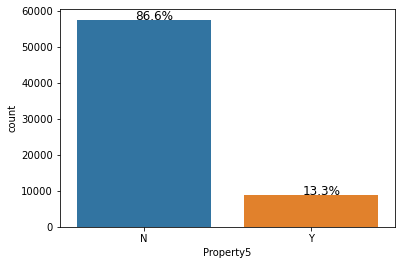

In [283]:
countplot_graph(sns.countplot(x='Property5',data=kaggle_test_df), kaggle_test_df.Property5)

Filling 'Property5' with 'N'.

In [284]:
kaggle_test_df['Property5'] = kaggle_test_df['Property5'].fillna('N')

In [285]:
kaggle_test_df['Property37'].value_counts()

Y    48880
N    17595
Name: Property37, dtype: int64

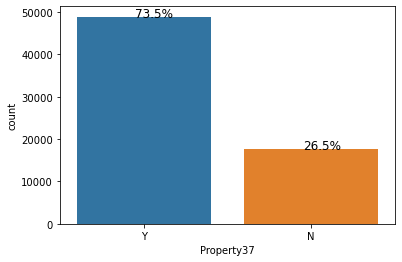

In [286]:
countplot_graph(sns.countplot(x='Property37',data=kaggle_test_df), kaggle_test_df.Property37)

In [287]:
kaggle_test_df['Property37'] = kaggle_test_df['Property37'].fillna('Y')

In [288]:
kaggle_test_df['Property39A'].value_counts()

Y    36118
N    30357
Name: Property39A, dtype: int64

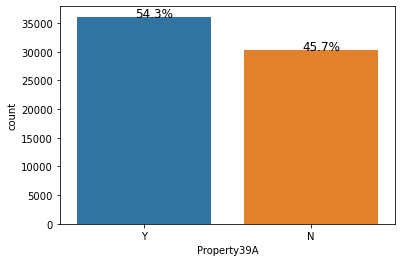

In [289]:
countplot_graph(sns.countplot(x='Property39A',data=kaggle_test_df), kaggle_test_df.Property39A)

In [290]:
kaggle_test_df['Property39A'] = kaggle_test_df['Property39A'].fillna('Y')

In [291]:
kaggle_test_df['Property4'].value_counts()

N    57881
Y     8592
Name: Property4, dtype: int64

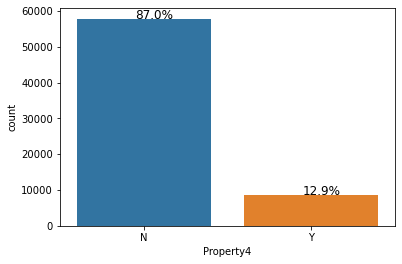

In [292]:
countplot_graph(sns.countplot(x='Property4',data=kaggle_test_df), kaggle_test_df.Property4)

In [293]:
kaggle_test_df['Property4'] = kaggle_test_df['Property4'].fillna('N')

In [294]:
kaggle_test_df['Personal5'].value_counts()

N    66125
Y      331
Name: Personal5, dtype: int64

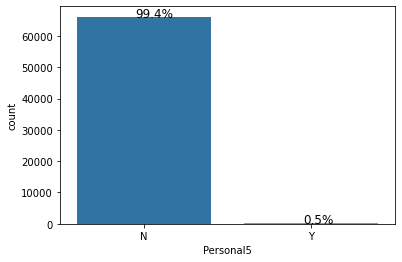

In [295]:
countplot_graph(sns.countplot(x='Personal5',data=kaggle_test_df), kaggle_test_df.Personal5)

In [296]:
kaggle_test_df['Personal5'] = kaggle_test_df['Personal5'].fillna('N')

In [297]:
kaggle_test_df['Property41'].value_counts()

N    63283
Y     3173
Name: Property41, dtype: int64

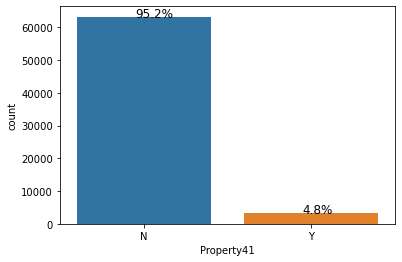

In [298]:
countplot_graph(sns.countplot(x='Property41',data=kaggle_test_df), kaggle_test_df.Property41)

In [299]:
kaggle_test_df['Property41'] = kaggle_test_df['Property41'].fillna('N')

In [300]:
kaggle_test_df['Property43'].value_counts()

N    64804
Y     1377
Name: Property43, dtype: int64

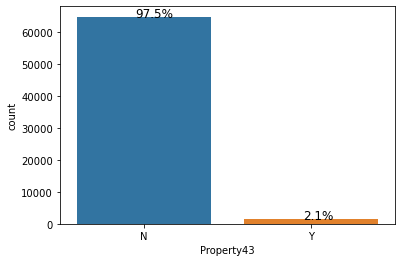

In [301]:
countplot_graph(sns.countplot(x='Property43',data=kaggle_test_df), kaggle_test_df.Property43)

In [302]:
kaggle_test_df['Property43'] = kaggle_test_df['Property43'].fillna('N')

In [303]:
kaggle_test_df['Personal76'].value_counts()

2.0    34373
1.0      409
5.0       22
3.0        3
7.0        1
Name: Personal76, dtype: int64

In [304]:
column_name = ['Personal76']
kaggle_test_df[column_name].describe()

,Personal76
count,34808.000000
mean,1.990376
std,0.134725
min,1.000000
25%,2.000000
50%,2.000000
75%,2.000000
max,7.000000


Above we can see that mean and median(50%) are almost equal, so we can fill out nan values with any of mean or median.

So filling nan values with median.

In [305]:
kaggle_test_df["Personal76"].fillna(kaggle_test_df["Personal76"].median(), inplace=True)

In [306]:
kaggle_test_df.isnull().sum()

Field4A          0
Field4B          0
Field5           0
Field6           0
Field7           0
Field8A          0
Field8B          0
Coverage1        0
Coverage2        0
Coverage3        0
Coverage4        0
Coverage5        0
Coverage6        0
Coverage7        0
Coverage8        0
Coverage9        0
Coverage10       0
Coverage11       0
Coverage12       0
Coverage13       0
Coverage14       0
Coverage15       0
Coverage16       0
Sales1           0
Sales2           0
Sales4A          0
Sales4B          0
Sales5           0
Sales6           0
Sales6A          0
Sales6B          0
Sales7A          0
Sales7B          0
Sales8           0
Sales9           0
Sales10          0
Sales11          0
Sales12          0
Sales13A         0
Sales13B         0
Personal1A       0
Personal1B       0
Personal2        0
Personal3        0
Personal4A       0
Personal4B       0
Personal5        0
Personal6        0
Personal7        0
Personal8A       0
Personal8B       0
Personal9        0
Personal10  

In [307]:
kaggle_test_df.shape

(66492, 299)

In [308]:
kaggle_test_df.duplicated().sum()

0

In [309]:
num_cols = kaggle_test_df._get_numeric_data()
cat_cols = list(set(kaggle_test_df.columns) - set(num_cols))
cat_cols

['Field7',
 'Property39A',
 'Geographic64',
 'Property35',
 'Property15',
 'Property5',
 'Property6',
 'Coverage13',
 'Property4',
 'Property8A',
 'Property36',
 'Personal16',
 'Geographic63',
 'Property42',
 'Personal14',
 'Field4A',
 'Property38',
 'Field8B',
 'Property37',
 'Property43',
 'Property41',
 'Coverage14',
 'Personal15',
 'Sales7A',
 'Personal5',
 'Property33',
 'Personal17']

In [310]:
for col in cat_cols:
  kaggle_test_df[col] = LabelEncoder().fit_transform(kaggle_test_df[col])

In [311]:
kaggle_test_df.shape

(66492, 299)

## Preparing the submission

In [312]:
kaggle_test_X = kaggle_test_df.drop(columns="keyValue")

In [313]:
from sklearn import preprocessing
scaler_ss = preprocessing.StandardScaler()
kaggle_test_X_scaled = scaler_ss.fit_transform(kaggle_test_X)

In [314]:
model.fit(main_X_scaled, main_y)

LogisticRegression()

In [315]:
predictions = model.predict(kaggle_test_X_scaled)
kaggle_test_df["Conversion_result"] = predictions
to_submit = kaggle_test_df[["keyValue", "Conversion_result"]]
to_submit.to_csv("submission.csv", index=False)
to_submit.head()

,keyValue,Conversion_result
0,148215,0
1,308369,0
2,1002,0
3,29867,0
4,253250,0
